# D209 Task 1 PA (Classification Analysis)
Vincent Taylor

---

## Part I

***Research Question***

The research question I want to answer for this analysis is what features contribute most to a customer churn? The question itself is fairly broad, however I believe it is the most important question we need to answer in terms of remaining a going concern in the telecom landscape. A piece from the CFA Institute goes on to define churn as *"Customer churn rate (also known as customer attrition rate) measures the proportion of contractual customers of a company who cease their subscriptions over a defined time period."* As I have discussed in prior write-ups the cost to acquire a customer is more expensive than it is to maintin an already existing customer. The benefits associated with this analysis are as follows; being able to indentify key aspects that contribute to customer churn will allow for the creation of strategies that can be implemented in order to mitigate the amount of customers choosing to churn. This can lead to a direct cost savings by not having to focuse as heavily on marketing to new customers. Another benefit associated for the company would be the competitve advantage that is created by using data in order to inform insights. I will answer this question using k-Nearest-Neighbors (KNN). 

**Objectives and Goals for this analysis**

The primary goal for this particular analysis is to be able to determine when a customer is likely to churn similar d208 task 2 we want to build a model that will help us predict the likelihood of churn and I would also like to see if we could get the accuracy of our model to be more accurate than the model we created in task 2 for D208. If the model is not able to predict churn more accurately than the logistic model, I would accept an accuracy greater than 70%. Based on the amount of predictor/independent variables we have in this dataset that we could use to aid with our prediction of churn. We will also need to check to see if there are more instances of churn than not churn and potentially using techniques like oversampling to ensure that the predictions of the model don't show bias. We want to create a model that would be something that we could easily deploy to make predictions on unseen data.

---

## Part II Method Justification

***Justificaton of Method***

For this task I will be using K-Nearest Neighbor (KNN). KNN is useful in both classification and regression. Datacamp describes KNN as a "voting system" in which the majority class label determines the class label of a new data point among it's nearest k neighbors in the feature space. I chose to use KNN for this task due to it being the most widely used for classification problems in the industry. My interpretation I got out of it was that it is an algorithm that stores all cases of a particular instance or variable and when new data is added it classifies it based on its similarity to variables it has seen. KNN is also easily interperatable and is easy to implement. KNN also does not require a training phase for data. Some cons associated with KNN with are it is extremely intensive on computer memory as it stores the entire training dataset, this can lead to the speed of predictions taking some time due to its need to compute distances and find neighbors within each data point. KNN is also extremely sensitive to outliers and we can see distored calculations influence predictions negatively. Lastly KNN would not perform well on high dimensonal data outputs where the number of features is similar to the number of or greater than the number of observations.

***Assumption of Classification Method***

One assumption of KNN is that the closer two points are together the more related they are, this is known as the local smoothness assumption. KNN uses distance measures to calculate proximity between datapoints the measures include; Manhattan and Euclidean distances or cosine similarity. We can also use visualization techniques such as PCA or scatter plots to see the proximity of features. 

***Package/Libarary Selection**

I chose to use Python to perform this analysis due to its ability to handle data analysis as well as it's ease of use when it comes to visualizing and performing statitsitcal modeling. I will also be using various packages in order to perform this analysis.

- Numpy and Pandas: Data analysis and preperation
- Matplotlib and Seaborn:Data visualization
- Scikit-learn: Machine learning and predictive modeling



---

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

# import data from csv
df = pd.read_csv('churn_clean.csv', index_col=0)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

### Data Cleaning Goals

(C1)
In order to prepare the data for KNN Classification I will need to encode the categorical variables to numeric values, as another assumption of KNN is that the predictor variables are numeric in nature. I will also need to change the columns to a pythonic naming convention as done in prior tasks, I will also need to check to ensure that there are no null values in the dataset, lastly will will need to make the dataset more concise and remove features that we arent using in the analysis in order to keep memory stress low on our machine while also ensure we are extracting meaningful features for this analysis. I will also be using features identified in d208 task 2 for this classification model, with the goal of 70% accuracy at  minimum. 



### Variable Selection

(C2)
Below are features I intend to use for this KNN analysis. The feature selection process I used is taking the features that showed promise in d208 task2 in order to see if I can use KNN to predict churn better than the logistic model did. I will be removing unecessary variables in order to reduce dimensonality as previously discussed. X represents the independent variables and y represents our dependent variable. 

---
|Variable|Continous/Categorical|x/y|
|---|---|---|
|Churn|Categorical|***Dependent***|
|Techie|Categorical|Independent|
|port_modem|Categorical|Independent|
|tablet|Categorical|Independent|
|phone|Categorical|Independent|
|multiple_lines|Categorical|Independent|
|online_security|Categorical|Independent|
|online_backup|Categorical|Independent|
|device_protection|Categorical|Independent|
|tech_support|Categorical|Independent|
|streaming_tv|Categorical|Independent|
|streaming_movies|Categorical|Independent|
|paperless_billing|Categorical|Independent|
|internet_service_DSL|Categorical|Independent|



---

### Exploratory Data Analysis

(D3)
Once the inital data cleaning has been completed I will be exploring the dataset using functions from prior tasks such as `.info()`, `.describe`, as well as `.value_counts()`. I will also verify the dataset to ensure that encoding has been completed using one hot encoding as well dropping already implied columns from the dataset in order to check for any relationships between our y variable and the independent x variables selected for classification. For the classification I will then spilit the data using test_train_split with a 70/30 split with 30% being used to train the model.

In [3]:
#Data Cleaning

#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

# dropping columns not relevant to analysis
df = df.drop(columns=['customer_id', 'interaction', 'UID',
                      'city', 'state', 'county','TimeZone', 
                      'job','zip', 'marital_type',
                      'lat', 'lng','population','active_listening',
                     'courteous_exchange','respectful_response','options',
                     'reliability','timely_replacements','timely_fixes',
                     'timely_response','income','area', 'children', 'age', 
                      'gender','outage_sec_perweek', 'contacts', 
                      'yearly_equip_failure', 'contract','payment_method', 
                      'tenure', 'monthly_charge','bandwidth_gb_year','email'])

In [4]:
#Checking for null values
if df.isnull().sum().sum() == 0:
    print("No null values.")
else:
    print("Null values exist!")

No null values.


In [5]:
#Creating dictionary for unique values and total count for each variable in dataset.
unique_count = {}

for column in df.columns:
    unique_value = df[column].unique()
    counts = df[column].value_counts()
    unique_count[column] = (unique_value, counts)

In [6]:
unique_count['techie']

(array(['No', 'Yes'], dtype=object),
 No     8321
 Yes    1679
 Name: techie, dtype: int64)

In [7]:
unique_count['churn']

(array(['No', 'Yes'], dtype=object),
 No     7350
 Yes    2650
 Name: churn, dtype: int64)

In [8]:
unique_count['port_modem']

(array(['Yes', 'No'], dtype=object),
 No     5166
 Yes    4834
 Name: port_modem, dtype: int64)

In [9]:
unique_count['tablet']

(array(['Yes', 'No'], dtype=object),
 No     7009
 Yes    2991
 Name: tablet, dtype: int64)

In [10]:
unique_count['phone']

(array(['Yes', 'No'], dtype=object),
 Yes    9067
 No      933
 Name: phone, dtype: int64)

In [11]:
unique_count['multiple_lines']

(array(['No', 'Yes'], dtype=object),
 No     5392
 Yes    4608
 Name: multiple_lines, dtype: int64)

In [12]:
unique_count['online_backup']

(array(['Yes', 'No'], dtype=object),
 No     5494
 Yes    4506
 Name: online_backup, dtype: int64)

In [13]:
unique_count['online_security']

(array(['Yes', 'No'], dtype=object),
 No     6424
 Yes    3576
 Name: online_security, dtype: int64)

In [14]:
unique_count['device_protection']

(array(['No', 'Yes'], dtype=object),
 No     5614
 Yes    4386
 Name: device_protection, dtype: int64)

In [15]:
unique_count['streaming_tv']

(array(['No', 'Yes'], dtype=object),
 No     5071
 Yes    4929
 Name: streaming_tv, dtype: int64)

In [16]:
unique_count['streaming_movies']

(array(['Yes', 'No'], dtype=object),
 No     5110
 Yes    4890
 Name: streaming_movies, dtype: int64)

In [17]:
unique_count['paperless_billing']

(array(['Yes', 'No'], dtype=object),
 Yes    5882
 No     4118
 Name: paperless_billing, dtype: int64)

In [18]:
unique_count['internet_service']

(array(['Fiber Optic', 'DSL', 'None'], dtype=object),
 Fiber Optic    4408
 DSL            3463
 None           2129
 Name: internet_service, dtype: int64)

In [19]:
# Converting yes/no columns to 1/0
yes_no_col = ['churn', 'techie', 'port_modem', 'tablet', 'phone', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
df[yes_no_col] = df[yes_no_col].replace({'Yes': 1, 'No': 0})

#Replacing binary non yes/no columns
df = pd.get_dummies(df, columns=['internet_service'])

#dropping implied column
df = df.drop(columns=['internet_service_None'])

In [20]:
df.head()

,churn,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic
CaseOrder,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1
2,1,1,0,1,1,1,1,0,0,0,1,1,1,0,1
3,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0
4,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0
5,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1


In [21]:
df.corr().abs()

,churn,techie,port_modem,tablet,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_DSL,internet_service_Fiber Optic
churn,1.000000,0.066722,0.008157,0.002779,0.026297,0.131771,0.013540,0.050508,0.056489,0.018838,0.230151,0.289262,0.007030,0.093487,0.058472
techie,0.066722,1.000000,0.014256,0.010992,0.003081,0.004661,0.015300,0.004540,0.021346,0.007391,0.003436,0.004298,0.001311,0.002565,0.002100
port_modem,0.008157,0.014256,1.000000,0.000940,0.002072,0.003014,0.003074,0.002092,0.004110,0.006304,0.000272,0.005674,0.004327,0.003371,0.003294
tablet,0.002779,0.010992,0.000940,1.000000,0.024825,0.019828,0.008849,0.003400,0.005657,0.010658,0.018233,0.020710,0.018502,0.001018,0.005469
phone,0.026297,0.003081,0.002072,0.024825,1.000000,0.003398,0.001177,0.003172,0.030339,0.005060,0.012464,0.002588,0.009228,0.000071,0.008126
multiple_lines,0.131771,0.004661,0.003014,0.019828,0.003398,1.000000,0.002436,0.002566,0.003207,0.010360,0.003097,0.004691,0.004657,0.010225,0.009210
online_security,0.013540,0.015300,0.003074,0.008849,0.001177,0.002436,1.000000,0.010338,0.012852,0.010774,0.001415,0.010575,0.001019,0.000715,0.014582
online_backup,0.050508,0.004540,0.002092,0.003400,0.003172,0.002566,0.010338,1.000000,0.009991,0.002802,0.008043,0.001434,0.010034,0.000181,0.001925
device_protection,0.056489,0.021346,0.004110,0.005657,0.030339,0.003207,0.012852,0.009991,1.000000,0.004475,0.002878,0.019450,0.013166,0.009688,0.006759
tech_support,0.018838,0.007391,0.006304,0.010658,0.005060,0.010360,0.010774,0.002802,0.004475,1.000000,0.003047,0.013533,0.000944,0.023172,0.026211


### Provide copy of cleaned dataset

---

In [22]:
# Save the entire dataset (C4)
df.to_csv('d209_cleaned.csv', index=False)

## Part IV

---

In [23]:
# Splitting data into train and test data (D1)
X = df[['techie', 'port_modem', 'tablet', 'phone', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'internet_service_DSL', 'internet_service_Fiber Optic']].assign(const=1)

y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

(D2)

I am using the 'test_train_split' function in the scikit learn library in order to split the testing and training data. I split the dataset into both training and testing data using a 70/30 split. The 30% will be the training data that will be used to help the model learn. I also have set stratify to y in order to ensure that the split data has some similarity between the train and test data.

---

In [24]:
#Saving four datasets to CSV (D1)
X_train.to_csv('d209_X_train.csv')
X_test.to_csv('d209_X_test.csv')
y_train.to_csv('d209_y_train.csv')
y_test.to_csv('d209_y_test.csv')

In [25]:
#Creating KNN Classifier
KNN = KNeighborsClassifier(n_neighbors=3)

#Fit classifier to the data
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

(D2)

To build the inital model I set in neighbors to 3. The default for this function is 5, but esentially the way it works is if 3 out of the 4 nearest points to a data point are no churn then the new data point will also be no churn. To further improve the final model I will use GridSearchCV in order to find the best n_neighbor.

I am also using the fit function in order to pass in the training data in order to fit the model.

---

In [26]:
# first 5 model predictions on the test data
KNN.predict(X_test)[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

(D2)

Based on the test data the third customer in our set is a customer that is a yes churn. 

---

In [27]:
#check accuracy of model on the test data
KNN.score(X_test, y_test)

0.72

(D2)

The inital model is accurate around 72% of the time, I will now try to hypertune the model using the GridSearchCV function in order to see if I am able to improve the accuracy by finding the optimal number for n_neighbors. The logistic regression model I created with the same variables was accurate around 77% of the time, so I know that this can be improved.

---

In [28]:
from sklearn.model_selection import GridSearchCV

# Determine what is the best number of neighbors to use
param_grid = {'n_neighbors' : np.arange(1, 25)}

# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit to training data
knn_cv.fit(X_train, y_train)

# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 20}

(D2)

I initally started with a range 1-50 and after running the GridSearch 20 seemed to be the optimal number for n_neighbors. Based on this I will now use the best_score function in order to see what the models mean accuracy of the scores. 

---

In [29]:
#check mean score for the top performing value of n_neighbors
knn_cv.best_score_

0.756375

The accuracy of the model has increased by 2% using the optimal number of n_neighbors based on the GridSearch.

---

In [32]:
y_pred = knn.predict(X_test)

In [33]:
# Create a KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of KNN Classifier: {accuracy}")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', conf_matrix)

#classificiation report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy of KNN Classifier: 0.7505
Confusion Matrix: 
 [[1382   88]
 [ 411  119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85      1470
           1       0.57      0.22      0.32       530

    accuracy                           0.75      2000
   macro avg       0.67      0.58      0.59      2000
weighted avg       0.72      0.75      0.71      2000



### Part V

---

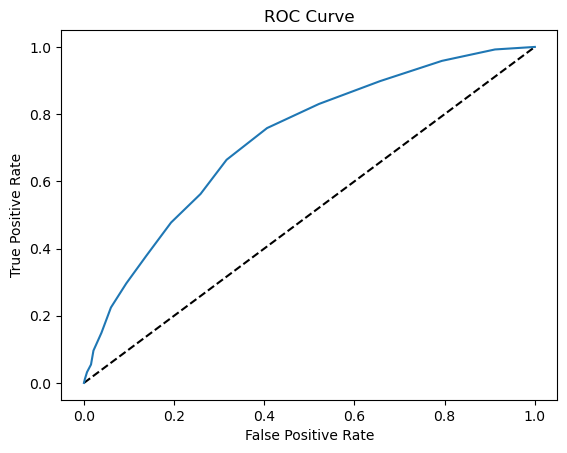

In [34]:
# Generate AUC score for KNN model
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")

AUC: 0.7263951995892697


#### (E1) Accuracy and AUC 

The model is accurate around 75% of the time which is a little worse than what the logisitic model I had created in D208 was at 77%. The data itself is a bit skewed with only 22% of the customer base actually churning. I believe that if we had more cases of churn the model would be able to increase it's accuracy.

The AUC score of 0.73 shows that the model has a fairly high chance of being able to predict churn, but I still would not trust this level of accuracy enough in order to implement this in a production environment. For reference an AUC = 1 would be a 100% accurate model meaning it is able to correctly distinguish churn from no churn and an AUC score of <=0.5 would mean that it is not able to distinguish a churn from a no churn and would definitely not be suitable for a production enviornment.

---

#### (E2) Classification Implications

Based on the AUC score of our model being between 0.5 and 1 means that it is better than random guessing but not completely accurate. The model is accurate in predicting churn around 75% of the time which is less than that of the logistic regression model I found it a bit dissapointing based on my hope of being able to tie specific features to the likelihood of customer churn. 

---

#### (E3) Limitations of analysis

A potential limitation of this analysis is that I used the default distance metric which was Euclidean distance when performing the classification. Had I chosen another distance metric the results may have been a more suitable choice and increased accuracy. Another limitation as previously discussed in my prior PAs is that we don't have enough domain knowledge in order to determine if a client is a true churn. For example a client may opt to select another provider for streaming_tv or streaming_movies but retain our fiber optic internet service. We would need further detail in order to even consider this model as useful.

---

#### (E4) Recommended Course of Action

My recommendation based on this analysis would be to have a call with internal stakeholders and let them know the results of what the KNN classification and potentially seeing if I could get more domain knowledge to ensure I am understanding what's needed in order to create a useful model. Then making a recommendation that we should potentially look at bundling services that show a high-churn rate. I believe this would be beneficial as we could use certain features as "loss leaders" in order to maintain more long-term customers and keeping maintaining them on higher cost products such as phone and internet.

---

## Sources 

Churn Rate. (n.d.). Corporate Finance Institute. https://corporatefinanceinstitute.com/resources/valuation/churn-rate/

Shafi, A. (2023, February). KNN Classification Tutorial using Sklearn Python. Www.datacamp.com. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Kumar, V. (2021, August 19). KNN Classifier in Sklearn using GridSearchCV with Example. MLK - Machine Learning Knowledge. https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/



### Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b0a43a7-af85-41e4-bf8d-b0d0017df663#

---